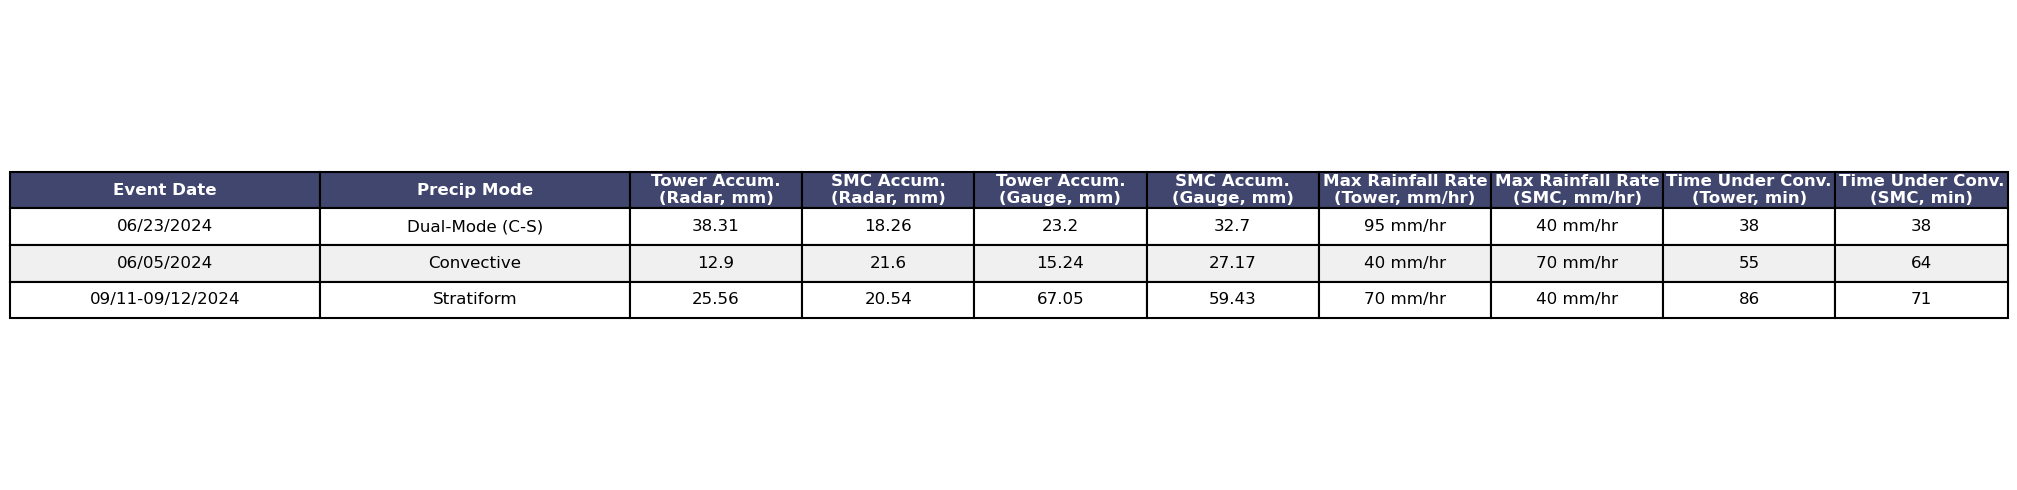

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
data = [
    ["Event Date", "Precip Mode", "Tower Accum.\n(Radar, mm)", "SMC Accum.\n(Radar, mm)", "Tower Accum.\n(Gauge, mm)", "SMC Accum.\n(Gauge, mm)", "Max Rainfall Rate\n(Tower, mm/hr)", "Max Rainfall Rate\n(SMC, mm/hr)", "Time Under Conv.\n(Tower, min)", "Time Under Conv.\n(SMC, min)"],
    ["06/23/2024", "Dual-Mode (C-S)", 38.31, 18.26, 23.2, 32.7, "95 mm/hr", "40 mm/hr", 38, 38],
    ["06/05/2024", "Convective", 12.90, 21.60, 15.24, 27.17, "40 mm/hr", "70 mm/hr",55, 64],
    ["09/11-09/12/2024", "Stratiform", 25.56, 20.54, 67.05, 59.43, "70 mm/hr", "40 mm/hr", 86, 71]
]

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Plotting the table using Matplotlib
fig, ax = plt.subplots(figsize=(20, 5))  # Adjust figsize as needed
ax.axis('off')  # Turn off axis
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', colLoc='center', loc='center')

# Adjust font size and cell properties
table.auto_set_font_size(False)
table.set_fontsize(12)  # Adjust font size as needed
table.scale(1.8, 1.8)  # Adjust table scale for better spacing

# Customizing the appearance
for key, cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(1.5)  # Increase line width for better visibility
    if key[0] == 0:
        cell.set_facecolor('#40466e')
        cell.set_text_props(weight='bold', color='w')
    else:
        cell.set_facecolor('#f0f0f0' if key[0] % 2 == 0 else 'w')
    cell.set_text_props(ha='center', va='center')  # Center align text
    if key[1] in [2, 3, 4, 5, 6, 7, 8, 9]:
        cell.set_width(0.1)  # Adjust column widths for better spacing

# Adjust layout to fit everything
plt.tight_layout()
plt.savefig("enhanced_table_fixed.png", bbox_inches='tight', dpi=300)
# Display the plot
plt.show()


In [8]:
import numpy as np

def calculate_rmse(observed, predicted):
    """
    Calculate the Root Mean Square Error (RMSE) between observed and predicted values.

    Parameters:
    observed (array-like): Observed values
    predicted (array-like): Predicted values

    Returns:
    float: RMSE value
    """
    observed = np.array(observed)
    predicted = np.array(predicted)
    
    # Compute the residuals
    residuals = observed - predicted
    
    # Square the residuals
    squared_residuals = residuals ** 2
    
    # Mean of the squared residuals
    mean_squared_residuals = np.mean(squared_residuals)
    
    # Square root of the mean
    rmse = np.sqrt(mean_squared_residuals)
    
    return rmse

# Example observed and predicted rainfall data
observed_rainfall = [23.2, 15.24, 67.05, 32.7, 27.17, 59.43]
predicted_rainfall = [38.31, 12.9, 25.56, 18.26, 21.6, 20.54]

# Calculate RMSE
rmse = calculate_rmse(observed_rainfall, predicted_rainfall)
print(f'RMSE: {rmse:.2f} mm')


RMSE: 24.86 mm


In [10]:
import numpy as np

def calculate_mape(observed, predicted):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) between observed and predicted values.

    Parameters:
    observed (array-like): Observed values
    predicted (array-like): Predicted values

    Returns:
    float: MAPE value as a percentage
    """
    observed = np.array(observed)
    predicted = np.array(predicted)
    
    # Calculate the absolute percentage errors
    percentage_errors = np.abs((observed - predicted) / observed)
    
    # Mean of the percentage errors
    mape = np.mean(percentage_errors) * 100
    
    return mape

# Example observed and predicted rainfall data
observed_rainfall = [23.2, 15.24, 67.05, 32.7, 27.17, 59.43]
predicted_rainfall = [38.31, 12.9, 25.56, 18.26, 21.6, 20.54]

# Calculate MAPE
mape = calculate_mape(observed_rainfall, predicted_rainfall)
print(f'MAPE: {mape:.2f}%')


MAPE: 45.41%


Percent Errors: [65.12931034 15.35433071 61.87919463 44.15902141 20.50055208 65.43833081]
Mean Percent Error: 45.41%


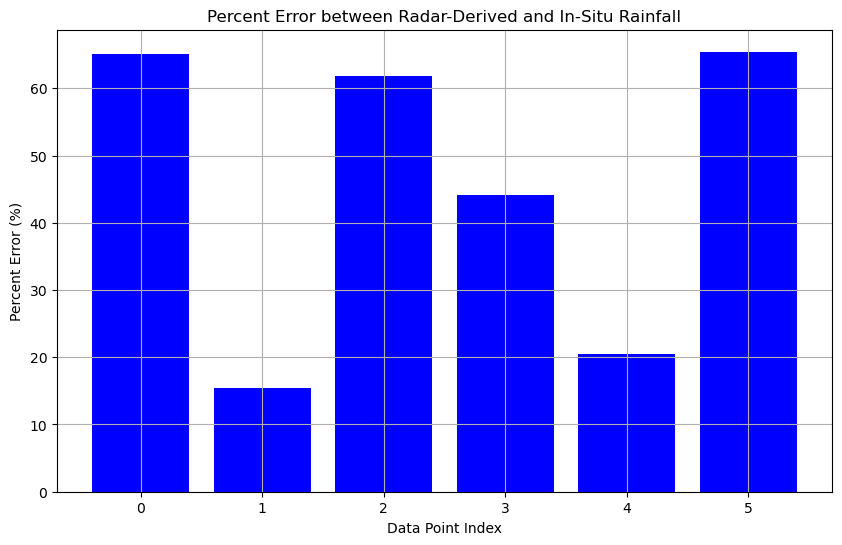

In [12]:
import numpy as np

# Given observed and predicted rainfall data
observed_rainfall = np.array([23.2, 15.24, 67.05, 32.7, 27.17, 59.43])
predicted_rainfall = np.array([38.31, 12.9, 25.56, 18.26, 21.6, 20.54])

# Calculate percent error for each data point
percent_errors = np.abs((observed_rainfall - predicted_rainfall) / observed_rainfall) * 100

# Calculate mean percent error
mean_percent_error = np.mean(percent_errors)

# Print percent errors and mean percent error
print("Percent Errors:", percent_errors)
print(f"Mean Percent Error: {mean_percent_error:.2f}%")

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(percent_errors)), percent_errors, color='blue')
plt.xlabel('Data Point Index')
plt.ylabel('Percent Error (%)')
plt.title('Percent Error between Radar-Derived and In-Situ Rainfall')
plt.grid(True)
plt.show()
